In [3]:
import matplotlib.pylab as plt
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
import copy


Capacidad de modelado: Entrene redes neuronales para resolver el problema de clasificación de las espirales anidadas que creamos en el TP 0. Use un número creciente de neuronas en la capa intermedia: 2, 10, 20, 40. Valores posibles para los demás parámetros de entrenamiento: learning rate 0.1, momentum 0.9, 600 datos para ajustar los modelos (20% de ese conjunto separarlo al azar para conjunto de validación), 2000 para testear, 1000 evaluaciones del entrenamiento, cada una de 20 épocas. Para cada uno de los cuatro modelos obtenidos, graficar en el plano xy las clasificaciones sobre el conjunto de test. Comentar.

In [4]:
from distribuciones import espirales_anidadas
from random import sample
import copy

In [5]:
neuronas_capa_int = [2,10,20,40]
lrate = 0.1
pmom  = 0.9
ndata = 600
ntest = 2000
nevaluaciones = 100
nepocas = 20

In [6]:
df = espirales_anidadas(ndata).drop(['r','tita'],axis=1)
y0 = df['clases']
x0 = df.drop(['clases'],axis = 1)

In [7]:
# 20% de 600 es 120
mask_validation = sample(list(np.arange(ndata)),120)
mask_train = np.delete(np.arange(ndata),mask_validation)

y_validation = y0.values[mask_validation]
x_validation = x0.values[mask_validation]

y_train = y0.values[mask_train]
x_train = x0.values[mask_train]

In [8]:
df_test = espirales_anidadas(ntest).drop(['r','tita'],axis=1)
y_test = df['clases']
x_test = df.drop(['clases'],axis = 1)

In [9]:
neuronas = 10
clasif = MLPClassifier(hidden_layer_sizes=(neuronas,), activation='logistic', solver='sgd', alpha=0.0, 
                       batch_size=1, learning_rate='constant', learning_rate_init=lrate,momentum=pmom,
                       nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=nepocas) 
clasif.fit(x_train,y_train)
y_pred = clasif.predict(x_validation)
error = sk.metrics.zero_one_loss(y_pred, y_validation)
print(error)

0.4083333333333333


/home/agustin/facultad/IntroML/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
%%time
neuronas = 10
errores = []
mejor_error = 1

clasif = MLPClassifier(hidden_layer_sizes=(neuronas,), activation='logistic', solver='sgd', alpha=0.0, 
                       batch_size=1, learning_rate='constant', learning_rate_init=lrate,momentum=pmom,
                       nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=nepocas) 

for i in range(100):

    clasif.fit(x_train,y_train)
    y_pred = clasif.predict(x_validation)
    error = sk.metrics.zero_one_loss(y_pred, y_validation)
    errores.append(error)
    if error < mejor_error:
        mejor_error = error
        mejor_clasif = copy.deepcopy(clasif)

CPU times: user 26.7 s, sys: 0 ns, total: 26.7 s
Wall time: 26.7 s


In [1]:
def entrenar_red(evaluaciones,red,neuronas,x_train,y_train,x_validation,y_validation,x_test,y_test):
    errores = []
    min_error = 1
    
    for i in range(evaluaciones):
        red.fit(x_train,y_train)
        y_pred = red.predict(x_validation)
        error_val = sk.metrics.zero_one_loss(y_pred, y_validation)
        #errores.append(error_valid)
        if error_val < min_error:
            min_error = error_val
            mejor_red = copy.deepcopy(red)
            
    pred_test = mejor_red.predict(x_test)
    error_test = sk.metrics.zero_one_loss(pred_test,y_test)

    pred_train = mejor_red.predict(x_train)
    error_train = sk.metrics.zero_one_loss(pred_train,y_train)

    
    return red, error_train, min_error, error_test

In [2]:
clasif = MLPClassifier(hidden_layer_sizes=(neuronas,), activation='logistic', solver='sgd', alpha=0.0, 
                       batch_size=1, learning_rate='constant', learning_rate_init=lrate,momentum=pmom,
                       nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=nepocas) 


red, error_train, error_val, error_test = entrenar_red(evaluaciones = 10, red = clasif, epocas = 10, 
                                                       x_train,y_train,x_validation,y_validation,x_test,y_test)

SyntaxError: positional argument follows keyword argument (853049084.py, line 7)

In [31]:
print(error_train, error_val, error_test)

0.39375000000000004 0.35 0.385


0.31666666666666665


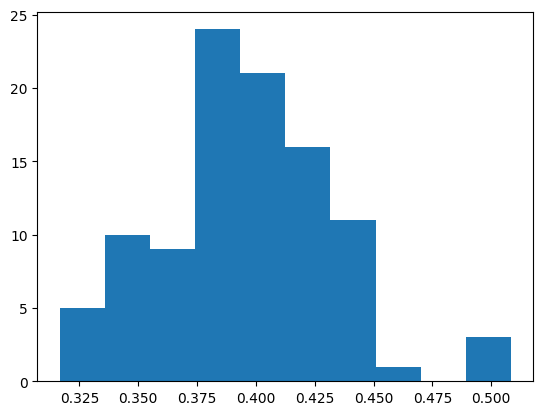

In [20]:
plt.hist(errores)
print(np.min(errores))

In [21]:
y_pred = mejor_clasif.predict(x_validation)
error = sk.metrics.zero_one_loss(y_pred, y_validation)
print(error)

0.31666666666666665
